In [1]:
import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


kaggle/input\crime-cast-forecasting-crime-categories\sample.csv
kaggle/input\crime-cast-forecasting-crime-categories\test.csv
kaggle/input\crime-cast-forecasting-crime-categories\train.csv


## Importing Libraries 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


# Dataset Loading 

In [3]:
train = pd.read_csv("kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_data = pd.read_csv("kaggle/input/crime-cast-forecasting-crime-categories/test.csv")


In [4]:
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings


# Exploratory Data Analysis (EDA)


In [5]:
print("Training data overview:")
train.head()

Training data overview:


,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03-09-2020 00:00,03-06-2020 00:00,1800,15,N Hollywood,1563,...,75,M,W,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345,13,Newton,1367,...,41,M,H,216,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605,13,Newton,1343,...,67,M,B,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11-08-2020 00:00,11-06-2020 00:00,1800,19,Mission,1924,...,61,M,H,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130,12,77th Street,1245,...,0,X,X,401,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [6]:
print("\nTest data overview:")
test_data.head()


Test data overview:


,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03-03-2020 00:00,03-03-2020 00:00,2000,3,Southwest,376,...,0416 1241 1243 1813 1821 2000,28,F,H,501,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06-01-2020 00:00,04/25/2020 12:00:00 AM,1700,20,Olympic,2014,...,0344 0394,26,M,B,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900,18,Southeast,1844,...,1822 0701 1914 0355 1202 0100,62,F,B,721,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12-03-2020 00:00,2200,7,Wilshire,765,...,NaN,0,NaN,NaN,108,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130,15,N Hollywood,1555,...,1501,37,F,W,501,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [7]:
# Check for missing values
print("\nMissing values in training data:")
print(train.isnull().sum())



Missing values in training data:
Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64


In [8]:
train

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03-09-2020 00:00,03-06-2020 00:00,1800,15,N Hollywood,1563,...,75,M,W,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345,13,Newton,1367,...,41,M,H,216,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605,13,Newton,1343,...,67,M,B,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11-08-2020 00:00,11-06-2020 00:00,1800,19,Mission,1924,...,61,M,H,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130,12,77th Street,1245,...,0,X,X,401,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700,3,Southwest,303,...,51,M,H,501,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259,10,West Valley,1008,...,0,M,W,301,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400,8,West LA,849,...,42,M,H,102,SIDEWALK,NaN,NaN,IC,Invest Cont,Property Crimes
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,06-10-2020 00:00,06-10-2020 00:00,600,5,Harbor,558,...,76,F,H,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Crimes against Public Order


In [9]:
print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in test data:
Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64


In [10]:
test_data

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03-03-2020 00:00,03-03-2020 00:00,2000,3,Southwest,376,...,0416 1241 1243 1813 1821 2000,28,F,H,501,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06-01-2020 00:00,04/25/2020 12:00:00 AM,1700,20,Olympic,2014,...,0344 0394,26,M,B,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900,18,Southeast,1844,...,1822 0701 1914 0355 1202 0100,62,F,B,721,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12-03-2020 00:00,2200,7,Wilshire,765,...,NaN,0,NaN,NaN,108,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130,15,N Hollywood,1555,...,1501,37,F,W,501,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4600 MASCOT ST,NaN,34.0409,-118.3408,06-05-2020 00:00,06-04-2020 00:00,2100,7,Wilshire,775,...,NaN,0,NaN,NaN,101,STREET,NaN,NaN,IC,Invest Cont
4996,2200 E 7TH ST,NaN,34.0347,-118.2253,12-02-2020 00:00,11/25/2020 12:00:00 AM,1530,4,Hollenbeck,471,...,1300 0325,0,X,X,116,OTHER/OUTSIDE,NaN,NaN,IC,Invest Cont
4997,LANGDON AV,TUPPER ST,34.2392,-118.4698,11/21/2020 12:00:00 AM,11/21/2020 12:00:00 AM,2100,19,Mission,1961,...,0913 1817 0416,38,M,H,101,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest
4998,400 E 5TH ST,NaN,34.0453,-118.2443,03-01-2020 00:00,02/29/2020 12:00:00 AM,2335,1,Central,147,...,0416,41,M,B,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other


# Data Analysis and Visualization

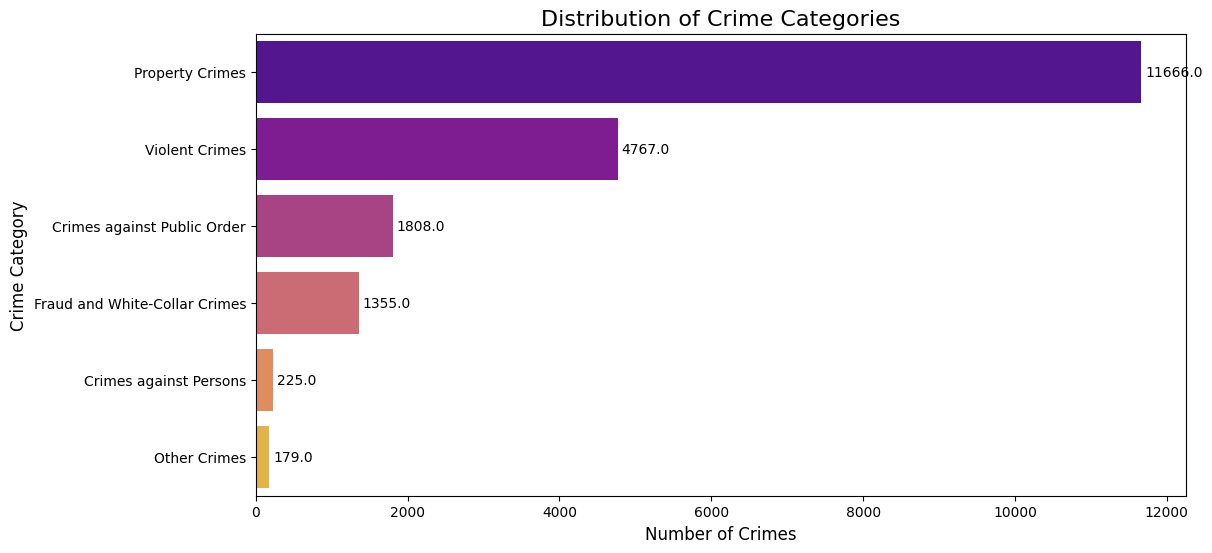

In [11]:
#Distribution of Crime Categories
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=train, y='Crime_Category', order = train['Crime_Category'].value_counts().index, palette='plasma')
plt.title('Distribution of Crime Categories', fontsize=16)
plt.xlabel('Number of Crimes', fontsize=12)
plt.ylabel('Crime Category', fontsize=12)

# Adding the count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 50, p.get_y() + p.get_height() / 2.), ha='left', va='center')
plt.show()

According to above graph property crimes is the highest crime category.

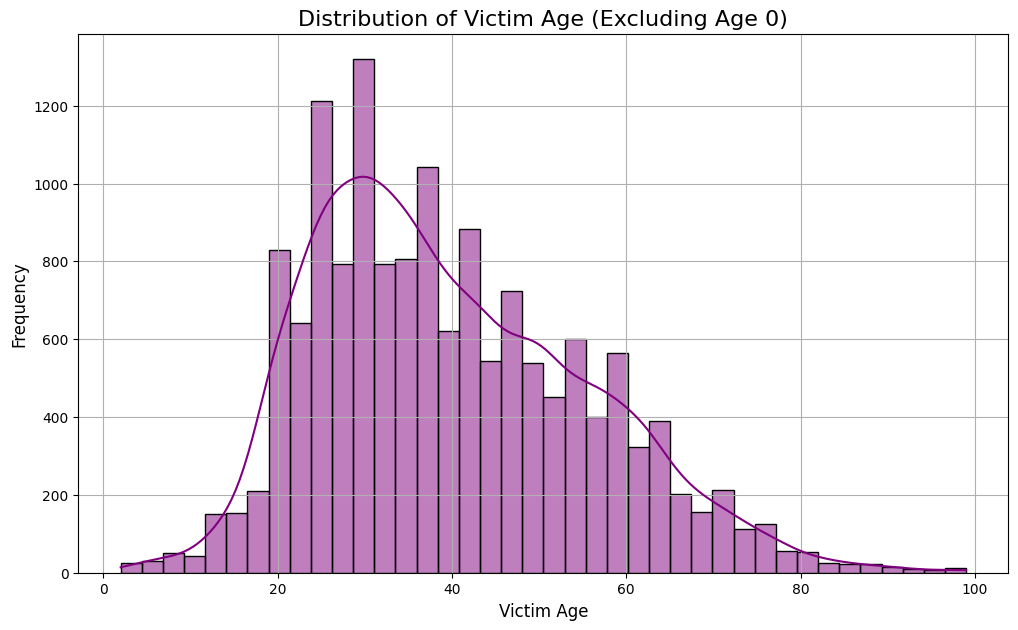

In [12]:
# Distribution of Victim Age (excluding age 0)
victim_age_filtered = train[train['Victim_Age'] > 0]['Victim_Age'].dropna()

plt.figure(figsize=(12, 7))
sns.histplot(victim_age_filtered, bins=40, kde=True, color='purple')
plt.title('Distribution of Victim Age (Excluding Age 0)', fontsize=16)
plt.xlabel('Victim Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

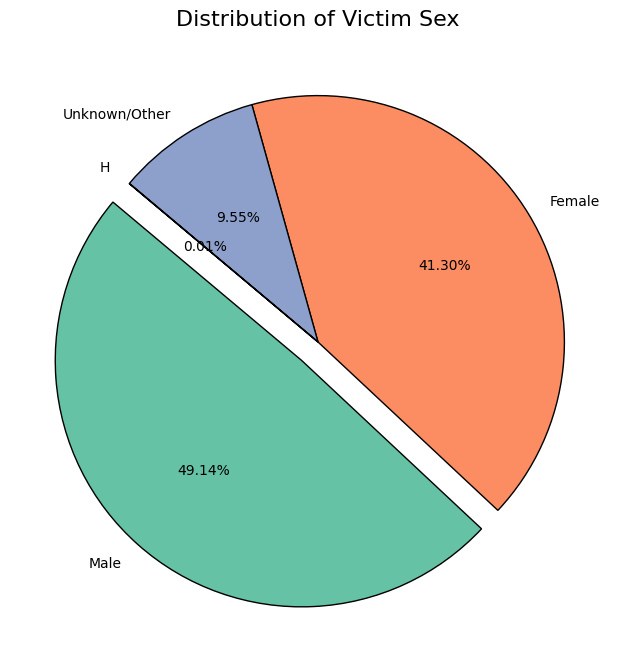

In [13]:
# Pie Chart for Victim Sex
victim_sex_counts = train['Victim_Sex'].value_counts()
labels = ['Male', 'Female', 'Unknown/Other', 'H']
explode = (0.1, 0, 0, 0) # Explode the 1st slice (Male)

plt.figure(figsize=(8, 8))
plt.pie(victim_sex_counts, labels=labels, autopct='%1.2f%%',
        colors=sns.color_palette('Set2'), startangle=140, explode=explode,
        wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Victim Sex', fontsize=16)
plt.show()

Chart Conclude that the maximum Victms are Males

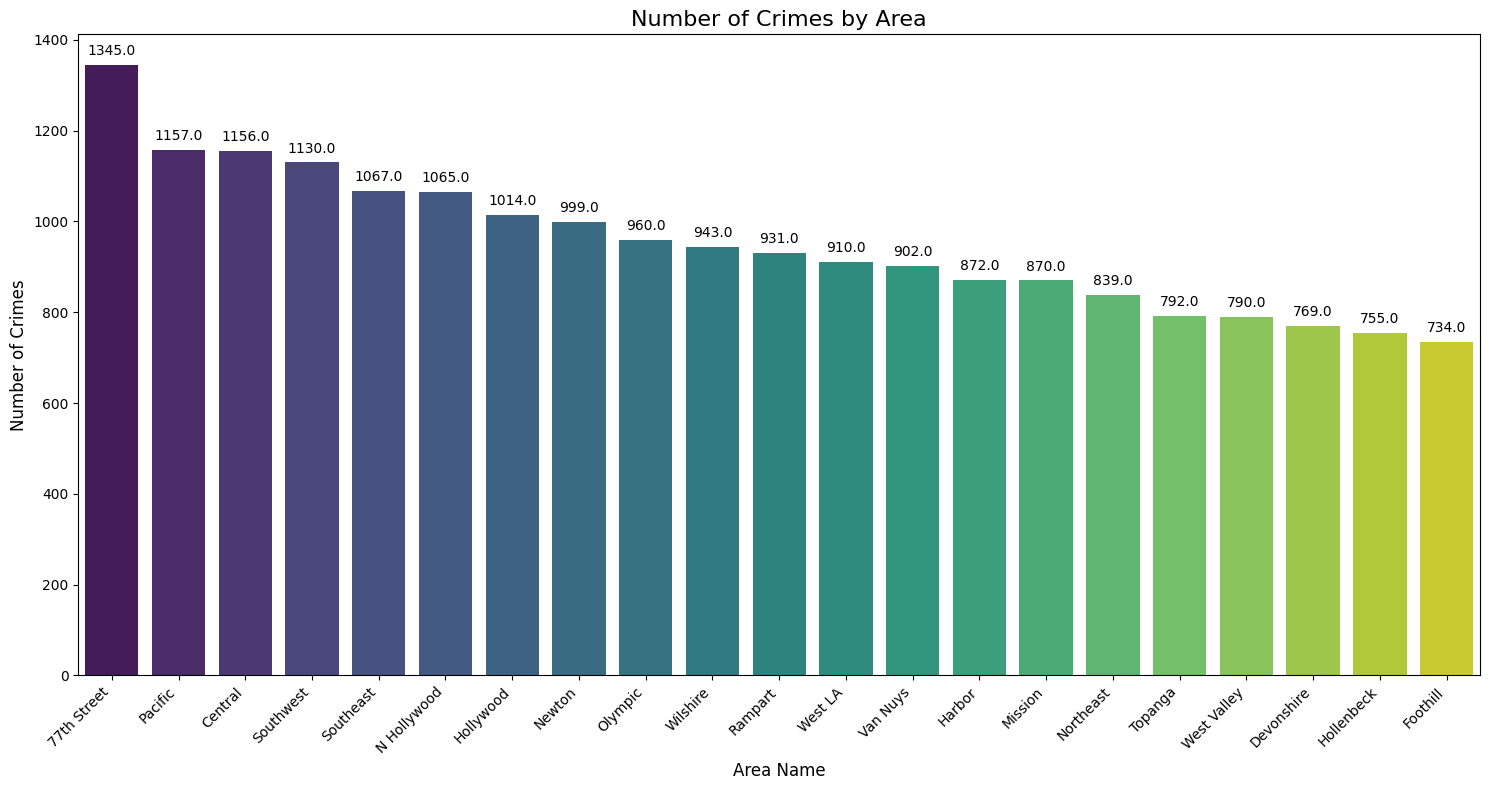

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crimes by Area
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=train, x='Area_Name', order = train['Area_Name'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Crimes by Area', fontsize=16)
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)

# Adding the count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()


## Feature Extractions 

In [15]:
#Extract useful features from Date_Reported and Date_Occurred
train['Date_Reported'] = pd.to_datetime(train['Date_Reported'], errors='coerce')
train['Date_Occurred'] = pd.to_datetime(train['Date_Occurred'], errors='coerce')

train['Year_Reported'] = train['Date_Reported'].dt.year
train['Month_Reported'] = train['Date_Reported'].dt.month
train['Day_Reported'] = train['Date_Reported'].dt.day
train['DayOfWeek_Reported'] = train['Date_Reported'].dt.dayofweek

train['Year_Occurred'] = train['Date_Occurred'].dt.year
train['Month_Occurred'] = train['Date_Occurred'].dt.month
train['Day_Occurred'] = train['Date_Occurred'].dt.day
train['DayOfWeek_Occurred'] = train['Date_Occurred'].dt.dayofweek


In [16]:
#Extract hour and minute from Time_Occurred
def extract_hour_minute(time_val):
    time_str = str(int(time_val)).zfill(4)
    hour = int(time_str[:2])
    minute = int(time_str[2:])
    return hour, minute

train[['Hour_Occurred', 'Minute_Occurred']] = train['Time_Occurred'].apply(lambda x: pd.Series(extract_hour_minute(x)))


## Apply the same transformations to the test data

In [17]:
test_data['Date_Reported'] = pd.to_datetime(test_data['Date_Reported'], errors='coerce')
test_data['Date_Occurred'] = pd.to_datetime(test_data['Date_Occurred'], errors='coerce')

test_data['Year_Reported'] = test_data['Date_Reported'].dt.year
test_data['Month_Reported'] = test_data['Date_Reported'].dt.month
test_data['Day_Reported'] = test_data['Date_Reported'].dt.day
test_data['DayOfWeek_Reported'] = test_data['Date_Reported'].dt.dayofweek

test_data['Year_Occurred'] = test_data['Date_Occurred'].dt.year
test_data['Month_Occurred'] = test_data['Date_Occurred'].dt.month
test_data['Day_Occurred'] = test_data['Date_Occurred'].dt.day
test_data['DayOfWeek_Occurred'] = test_data['Date_Occurred'].dt.dayofweek

test_data[['Hour_Occurred', 'Minute_Occurred']] = test_data['Time_Occurred'].apply(lambda x: pd.Series(extract_hour_minute(x)))


In [18]:
# Process Modus_Operandi column
train['Modus_Operandi'] = train['Modus_Operandi'].fillna('').apply(lambda x: x.split())
test_data['Modus_Operandi'] = test_data['Modus_Operandi'].fillna('').apply(lambda x: x.split())


In [19]:
mlb = MultiLabelBinarizer()
train_mo = pd.DataFrame(mlb.fit_transform(train['Modus_Operandi']), columns=mlb.classes_, index=train.index)
test_mo = pd.DataFrame(mlb.transform(test_data['Modus_Operandi']), columns=mlb.classes_, index=test_data.index)

train = train.join(train_mo).drop(columns=['Modus_Operandi'])
test_data = test_data.join(test_mo).drop(columns=['Modus_Operandi'])


In [20]:
# Drop other unnecessary columns
columns_to_drop = ['Location', 'Cross_Street', 'Premise_Description', 
                   'Weapon_Used_Code', 'Area_Name','Weapon_Description',
                   'Date_Occurred', 'Date_Reported', 'Time_Occurred']
existing_columns_to_drop = [col for col in columns_to_drop if col in train.columns]
train = train.drop(columns=existing_columns_to_drop)
test_data = test_data.drop(columns=existing_columns_to_drop)


In [21]:
train.head()

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,34.1522,-118.3910,15,1563,1,75,M,W,101,IC,...,0,0,0,0,0,0,0,0,0,0
1,34.0028,-118.2391,13,1367,1,41,M,H,216,IC,...,0,0,0,0,0,0,0,0,0,0
2,34.0111,-118.2653,13,1343,2,67,M,B,501,IC,...,0,0,0,0,0,0,0,0,0,0
3,34.2953,-118.4590,19,1924,1,61,M,H,101,IC,...,0,0,0,0,0,0,0,0,0,0
4,33.9787,-118.2918,12,1245,1,0,X,X,401,IC,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test_data.head()

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,34.0128,-118.3045,3,376,2,28,F,H,501,IC,...,0,0,0,0,0,0,0,0,0,0
1,34.0726,-118.3029,20,2014,1,26,M,B,502,IC,...,0,0,0,0,0,0,0,0,0,0
2,33.9348,-118.2695,18,1844,2,62,F,B,721,IC,...,0,0,0,0,0,0,0,0,0,0
3,34.0497,-118.3442,7,765,1,0,NaN,NaN,108,IC,...,0,0,0,0,0,0,0,0,0,0
4,34.1611,-118.3704,15,1555,2,37,F,W,501,AO,...,0,0,0,0,0,0,0,0,0,0


## Label Encoding and Data Imputation 

In [23]:
# Label encode the Status column
label_encoder_status = LabelEncoder()
train['Status'] = label_encoder_status.fit_transform(train['Status'])
test_data['Status'] = label_encoder_status.transform(test_data['Status'])

# Impute negative and zero values in Victim_Age with the median of positive values
median_victim_age = train[train['Victim_Age'] > 0]['Victim_Age'].median()
train['Victim_Age'] = train['Victim_Age'].apply(lambda x: median_victim_age if x <= 0 else x)
test_data['Victim_Age'] = test_data['Victim_Age'].apply(lambda x: median_victim_age if x <= 0 else x)

# Impute missing values for Victim_Sex with 'M'
train['Victim_Sex'].fillna('M', inplace=True)
test_data['Victim_Sex'].fillna('M', inplace=True)

# Impute missing values for Victim_Descent with 'B'
train['Victim_Descent'].fillna('B', inplace=True)
test_data['Victim_Descent'].fillna('B', inplace=True)


## Data Training Testing and Spliting 
## encoding

In [24]:
# Spliting the data into features and target variable
X = train.drop('Crime_Category', axis=1)
y = train['Crime_Category']

# Spliting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)



In [25]:
pd.DataFrame(X)

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,34.1522,-118.3910,15,1563,1,75.0,M,W,101,2,...,0,0,0,0,0,0,0,0,0,0
1,34.0028,-118.2391,13,1367,1,41.0,M,H,216,2,...,0,0,0,0,0,0,0,0,0,0
2,34.0111,-118.2653,13,1343,2,67.0,M,B,501,2,...,0,0,0,0,0,0,0,0,0,0
3,34.2953,-118.4590,19,1924,1,61.0,M,H,101,2,...,0,0,0,0,0,0,0,0,0,0
4,33.9787,-118.2918,12,1245,1,37.0,X,X,401,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,3,303,2,51.0,M,H,501,2,...,0,0,0,0,0,0,0,0,0,0
19996,34.2212,-118.5011,10,1008,1,37.0,M,W,301,2,...,0,0,0,0,0,0,0,0,0,0
19997,34.0571,-118.3815,8,849,1,42.0,M,H,102,2,...,0,0,0,0,0,0,0,0,0,0
19998,33.7451,-118.2835,5,558,2,76.0,F,H,501,2,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Encoding the target variable
label_encoder_crime = LabelEncoder()
y_train = label_encoder_crime.fit_transform(y_train)
y_val = label_encoder_crime.transform(y_val)


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical variables
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
         ['Victim_Sex', 'Victim_Descent', 'Status', 'Area_ID']),
        
        # Standardize numerical features
        ('ss', StandardScaler(), ['Latitude', 'Longitude']),
        
        # Apply TF-IDF to the text data 
        ('tfidf', TfidfVectorizer(), 'Status_Description'),
        
        # Pass through other numerical columns
        ('passthrough', 'passthrough', ['Premise_Code', 'Reporting_District_no', 'Victim_Age',
                                        'Year_Reported', 'Month_Reported', 'Day_Reported', 
                                        'DayOfWeek_Reported', 'Year_Occurred', 'Month_Occurred', 
                                        'Day_Occurred', 'DayOfWeek_Occurred', 'Hour_Occurred', 
                                        'Minute_Occurred'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Fit and transform the data
transformed_data = preprocessor.fit_transform(train)

# If needed, convert the result to a DataFrame
column_names = (preprocessor.get_feature_names_out())
transformed_df = pd.DataFrame(transformed_data, columns=column_names)

# Display the first few rows of the transformed DataFrame
transformed_df.head()


,Victim_Sex_F,Victim_Sex_H,Victim_Sex_M,Victim_Sex_X,Victim_Descent_A,Victim_Descent_B,Victim_Descent_C,Victim_Descent_D,Victim_Descent_F,Victim_Descent_G,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Create the pipeline

In [28]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
pipeline

,steps,"[('preprocessor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe', ...), ('ss', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [29]:
# Transform the data
X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(test_data)

## Defining the models

In [30]:
# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
    
}

# Models Comparision 

In [31]:
# Train, predict, and evaluate each model
model_accuracies = {}
model_f1_scores = {}
model_precisions = {}
model_recalls = {}


Random Forest accuracy: 0.9314
Random Forest F1 score: 0.9262
Random Forest Precision: 0.9259
Random Forest Recall: 0.9314


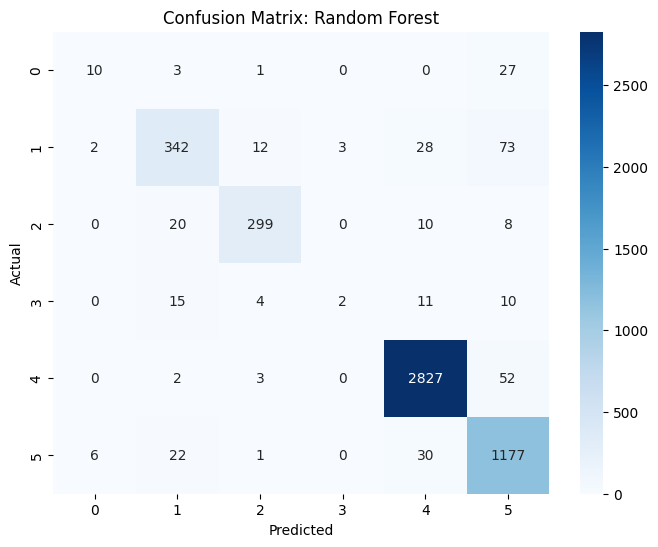

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.56      0.24      0.34        41
           1       0.85      0.74      0.79       460
           2       0.93      0.89      0.91       337
           3       0.40      0.05      0.09        42
           4       0.97      0.98      0.98      2884
           5       0.87      0.95      0.91      1236

    accuracy                           0.93      5000
   macro avg       0.76      0.64      0.67      5000
weighted avg       0.93      0.93      0.93      5000

--------------------------------------------------
XGBoost accuracy: 0.9492
XGBoost F1 score: 0.9478
XGBoost Precision: 0.9471
XGBoost Recall: 0.9492


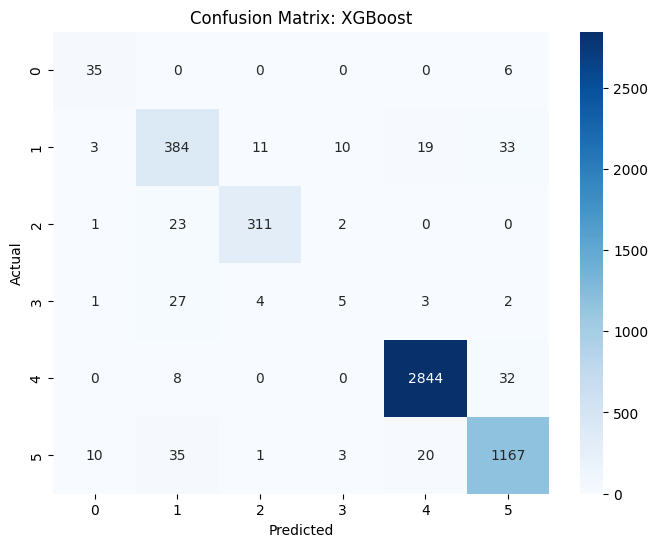

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        41
           1       0.81      0.83      0.82       460
           2       0.95      0.92      0.94       337
           3       0.25      0.12      0.16        42
           4       0.99      0.99      0.99      2884
           5       0.94      0.94      0.94      1236

    accuracy                           0.95      5000
   macro avg       0.77      0.78      0.77      5000
weighted avg       0.95      0.95      0.95      5000

--------------------------------------------------
Decision Tree accuracy: 0.9192
Decision Tree F1 score: 0.9200
Decision Tree Precision: 0.9215
Decision Tree Recall: 0.9192


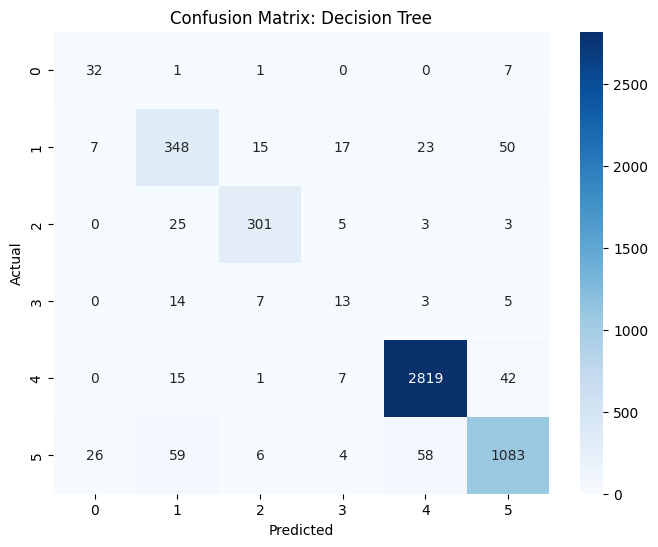

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.49      0.78      0.60        41
           1       0.75      0.76      0.75       460
           2       0.91      0.89      0.90       337
           3       0.28      0.31      0.30        42
           4       0.97      0.98      0.97      2884
           5       0.91      0.88      0.89      1236

    accuracy                           0.92      5000
   macro avg       0.72      0.77      0.74      5000
weighted avg       0.92      0.92      0.92      5000

--------------------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1596
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 227
[LightGBM] 

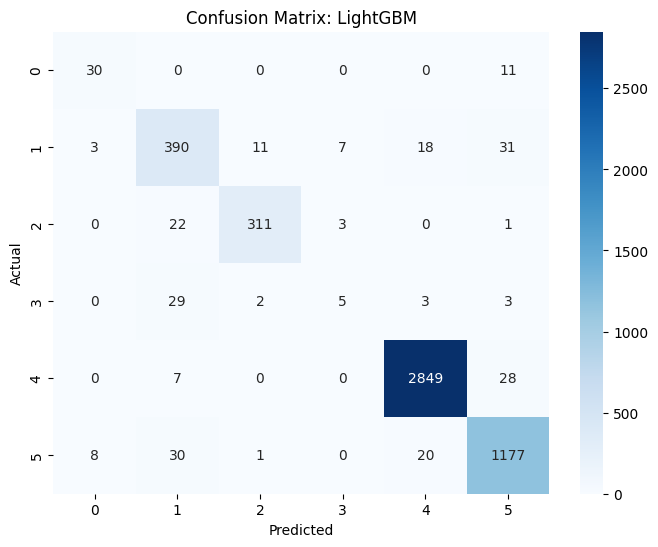

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.82      0.85      0.83       460
           2       0.96      0.92      0.94       337
           3       0.33      0.12      0.18        42
           4       0.99      0.99      0.99      2884
           5       0.94      0.95      0.95      1236

    accuracy                           0.95      5000
   macro avg       0.79      0.76      0.77      5000
weighted avg       0.95      0.95      0.95      5000

--------------------------------------------------


In [32]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    model_accuracies[model_name] = accuracy
    
    # Calculate F1 score
    f1 = f1_score(y_val, y_pred, average='weighted')
    model_f1_scores[model_name] = f1
    
    # Calculate precision
    precision = precision_score(y_val, y_pred, average='weighted')
    model_precisions[model_name] = precision
    
    # Calculate recall
    recall = recall_score(y_val, y_pred, average='weighted')
    model_recalls[model_name] = recall
    
    # Print the scores
    print(f"{model_name} accuracy: {accuracy:.4f}")
    print(f"{model_name} F1 score: {f1:.4f}")
    print(f"{model_name} Precision: {precision:.4f}")
    print(f"{model_name} Recall: {recall:.4f}")
    
    # Generate and plot the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Print classification report
    print(f'Classification Report for {model_name}:')
    print(classification_report(y_val, y_pred))
    print('--------------------------------------------------')

In [33]:
# Output the results
print("\nModel Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")



Model Accuracies:
Random Forest: 0.9314
XGBoost: 0.9492
Decision Tree: 0.9192
LightGBM: 0.9524


In [34]:
print("\nModel F1 Scores:")
for model_name, f1 in model_f1_scores.items():
    print(f"{model_name}: {f1:.4f}")



Model F1 Scores:
Random Forest: 0.9262
XGBoost: 0.9478
Decision Tree: 0.9200
LightGBM: 0.9505


In [35]:
print("\nModel Precisions:")
for model_name, precision in model_precisions.items():
    print(f"{model_name}: {precision:.4f}")


Model Precisions:
Random Forest: 0.9259
XGBoost: 0.9471
Decision Tree: 0.9215
LightGBM: 0.9496


In [36]:
print("\nModel Recalls:")
for model_name, recall in model_recalls.items():
    print(f"{model_name}: {recall:.4f}")


Model Recalls:
Random Forest: 0.9314
XGBoost: 0.9492
Decision Tree: 0.9192
LightGBM: 0.9524


Graphical representation of Accuracies 

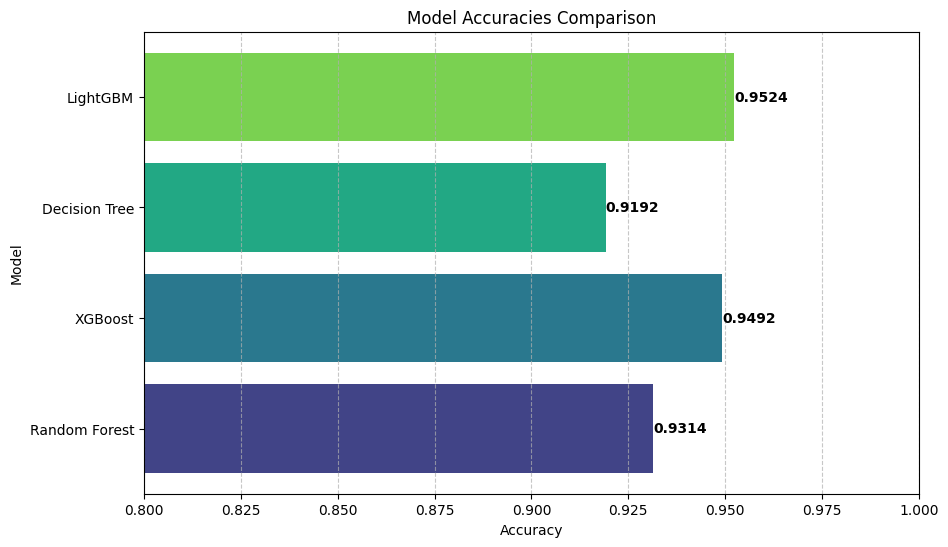

In [37]:
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Set a color palette with different colors for each bar
palette = sns.color_palette("viridis", len(model_names))

# Create a bar graph with the colorful palette
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracies, color=palette)

# Add accuracy values to the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(accuracy, bar.get_y() + bar.get_height() / 2, f"{accuracy:.4f}", 
             va='center', ha='left', color='black', fontweight='bold')

plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracies Comparison')
plt.xlim(0.8, 1)  # Accuracy values range from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

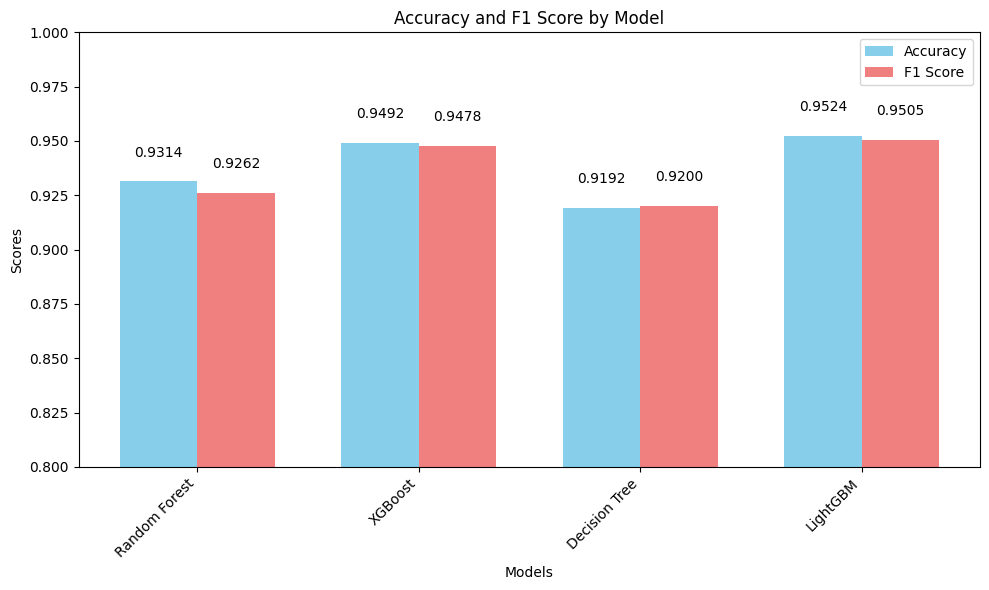

In [38]:
# Data preparation
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
f1_scores = list(model_f1_scores.values())

# Define the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for accuracy and F1 score
bars1 = ax.bar(index, accuracies, bar_width, label='Accuracy', color='skyblue')
bars2 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1 Score', color='lightcoral')

#setting y axis's limit
ax.set_ylim(0.8, 1.0)


# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score by Model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Display the values on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Comparision Result 
On the basis of above analysis it is clear that LightGBM is the best Model 

# HyperParaMeter tuning and cross fold validation of Best Model


In [39]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, KFold

lgbm = lgb.LGBMClassifier(random_state=64)
Param_grid = {
    'boosting_type':['gbdt'],#'dart',"goss"],
    'num_leaves':[31],#50,100,150],
    'max_depth':[-1],#10,20,30,50],
    'learning_rate':[0.1],#0.001,0.01,0.1,0.2,0.3],
    'n_estimators':[100],#50,100,200,300],
    'subsample':[1.0],# 0.6,0.8,1.0],
    'colsample_bytree':[1], #0.6,0.8,1.0],
    'reg_alpha':[0],# 0.1,0.5,1.0],
    'reg_lambda':[0],#0.1,0.5,1.0]
}

gscv=GridSearchCV(lgbm, Param_grid, cv=2, scoring='accuracy',n_jobs=-1)

# Fit the GridSearchCV model
gscv.fit(X_train, y_train)

# Get the best model and parameters
best_lgbm_model = gscv.best_estimator_
print(f"Best parameters found for LightGBM: {gscv.best_params_}")

# Evaluate the best model on the validation set
y_val_pred_lgbm = best_lgbm_model.predict(X_val)
accuracy_lgbm = accuracy_score(y_val, y_val_pred_lgbm)
print(f"Validation accuracy with LightGBM (with CV): {accuracy_lgbm:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1596
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 227
[LightGBM] [Info] Start training from score -4.400870
[LightGBM] [Info] Start training from score -2.409428
[LightGBM] [Info] Start training from score -2.690210
[LightGBM] [Info] Start training from score -4.695825
[LightGBM] [Info] Start training from score -0.535346
[LightGBM] [Info] Start training from score -1.446469
Best parameters found for LightGBM: {'boosting_type': 'gbdt', 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 1.0}
Validation accuracy with LightGBM (with CV): 0.9524


### Validation accuracy with LightGBM


In [40]:
# Predictions for the test set
y_test_pred_lgbm = best_lgbm_model.predict(X_test)

# Inverse transform predictions to original labels (if encoded)
y_test_pred_lgbm_original = label_encoder_crime.inverse_transform(y_test_pred_lgbm)

In [41]:
# Create the final csv file
final_lgbm = pd.DataFrame({'ID': range(1, len(y_test_pred_lgbm_original) + 1), 'Crime_Category': y_test_pred_lgbm_original})
final_lgbm.to_csv('final_lgbm.csv', index=False)